## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
import glob
train_path = glob.glob("/content/drive/My Drive/Complete Projects/Tomato-Leaf-Disease-Prediction-master/Dataset/Train")
valid_path = glob.glob("/content/drive/My Drive/Complete Projects/Tomato-Leaf-Disease-Prediction-master/Dataset/Test")

In [ ]:
# useful for getting number of classes
folders = glob.glob('/content/drive/My Drive/Complete Projects/Tomato-Leaf-Disease-Prediction-master/Dataset/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Complete Projects/Tomato-Leaf-Disease-Prediction-master/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10010 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Complete Projects/Tomato-Leaf-Disease-Prediction-master/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1010 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
313/313 [==============================] - 3530s 11s/step - loss: 3.1922 - accuracy: 0.2764 - val_loss: 1.7577 - val_accuracy: 0.3901
Epoch 2/50
313/313 [==============================] - 133s 423ms/step - loss: 1.9044 - accuracy: 0.4112 - val_loss: 3.2725 - val_accuracy: 0.3277
Epoch 3/50
313/313 [==============================] - 131s 418ms/step - loss: 1.7805 - accuracy: 0.4647 - val_loss: 2.1489 - val_accuracy: 0.4485
Epoch 4/50
313/313 [==============================] - 131s 418ms/step - loss: 1.7007 - accuracy: 0.4810 - val_loss: 2.0665 - val_accuracy: 0.4693
Epoch 5/50
313/313 [==============================] - 130s 415ms/step - loss: 1.7101 - accuracy: 0.5034 - val_loss: 2.2201 - val_accuracy: 0.4257
Epoch 6/50
313/313 [==============================] - 132s 423ms/step - loss: 1.6765 - accuracy: 0.5166 - val_loss: 1.9932 - val_accuracy: 0.4663
Epoch 7/50
313/313 [==============================] - 131s 418ms/step - loss: 1.5526 - accuracy: 0.5430 - val_loss: 2.0448 - 

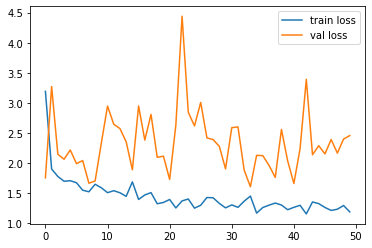

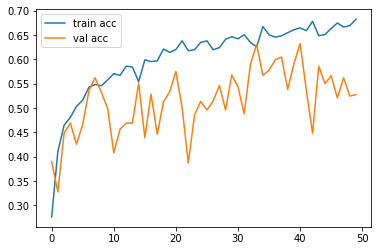

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('/content/drive/My Drive/Complete Projects/Tomato-Leaf-Disease-Prediction-master/model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[9.9884260e-01, 3.4756729e-04, 1.5766769e-05, ..., 1.8546381e-06,
        5.3226216e-08, 5.6237015e-10],
       [9.9999213e-01, 3.8446535e-07, 1.6363370e-07, ..., 1.9916119e-10,
        9.6114672e-14, 4.3943699e-10],
       [5.9534489e-08, 6.6006358e-08, 1.8401587e-06, ..., 7.4999624e-14,
        4.6521125e-09, 1.2860746e-02],
       ...,
       [4.0610978e-08, 5.4485659e-05, 1.8727806e-01, ..., 1.5990714e-09,
        5.9684576e-03, 6.7863198e-06],
       [9.9525565e-01, 3.0360511e-06, 1.0105077e-05, ..., 1.6082112e-10,
        3.2045728e-15, 5.1961447e-06],
       [1.0942136e-12, 6.0852900e-10, 1.1386982e-09, ..., 8.1250631e-11,
        3.9214487e-03, 9.9601007e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 6, ..., 3, 0, 9])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/My Drive/Complete Projects/Tomato-Leaf-Disease-Prediction-master/model_resnet50.h5')

In [ ]:
img = image.load_img('/content/drive/MyDrive/Complete Projects/Tomato-Leaf-Disease-Prediction-master/Dataset/Test/tomato.JPG', target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[185., 170., 167.],
        [183., 168., 165.],
        [189., 174., 171.],
        ...,
        [132., 112., 105.],
        [142., 122., 115.],
        [156., 136., 129.]],

       [[192., 177., 174.],
        [189., 174., 171.],
        [188., 173., 170.],
        ...,
        [117.,  97.,  90.],
        [110.,  90.,  83.],
        [153., 133., 126.]],

       [[182., 167., 164.],
        [190., 175., 172.],
        [195., 180., 177.],
        ...,
        [122., 102.,  95.],
        [156., 136., 129.],
        [144., 124., 117.]],

       ...,

       [[164., 148., 148.],
        [171., 155., 155.],
        [180., 164., 164.],
        ...,
        [138., 118., 111.],
        [152., 132., 125.],
        [130., 110., 103.]],

       [[173., 157., 157.],
        [177., 161., 161.],
        [181., 165., 165.],
        ...,
        [125., 105.,  98.],
        [140., 120., 113.],
        [137., 117., 110.]],

       [[173., 157., 157.],
        [176., 160., 160.],
        [180., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.0000000e+00, 1.0000000e+00, 7.4018814e-14, 1.1154155e-36,
        2.6134487e-22, 0.0000000e+00, 5.8411232e-30, 0.0000000e+00,
        0.0000000e+00, 2.3121415e-20]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([1])

In [ ]:
a==1

array([ True])